# CASE STUDY 7

# Importing the libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# 1.Reading the dataset into the python environment

In [2]:
data= pd.read_excel('iris (3).xls')

In [3]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.shape
##checking the shape of the dataset

(150, 5)

In [5]:
data.info()
##to get the basic information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()
##Checking the statistics of columns

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.isna().sum()
##Checking for any null values present in the dataset 

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

# 2. pre-processing steps.

# 1. Filling the Missing Values

<AxesSubplot:xlabel='SL', ylabel='Density'>

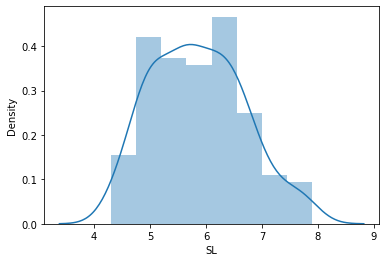

In [8]:
##filling the missing values in "SL"
##Here inorder to fill the missing values we need to take the distribution of "SL" data 


sns.distplot(data['SL'],kde=True)

<AxesSubplot:xlabel='SW', ylabel='Density'>

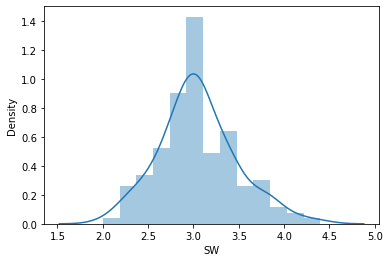

In [9]:
## filling with the median as the distribution is right skewed
data['SL'] = data['SL'].fillna(data['SL'].median())
##filling the missing values in "SW"
##Here inorder to fill the missing values we need to take its distribution 

sns.distplot(data['SW'],kde=True)

<AxesSubplot:xlabel='PL', ylabel='Density'>

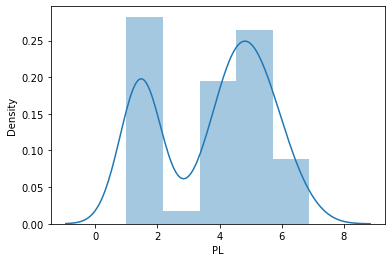

In [10]:
## filling with the median
data['SW'] = data['SW'].fillna(data['SW'].median())
##filling the missing values in "PL"
##Here inorder to fill the missing values we need to take the distribution of "PL" data 


sns.distplot(data['PL'],kde=True)

In [11]:
## filling with the median 
data['PL'] = data['PL'].fillna(data['PL'].median())


In [12]:
data.isna().sum()
##Checking for any null values present in the dataset 

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# 2.Handling outliners

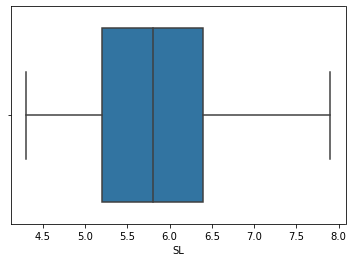

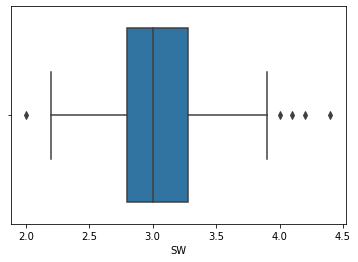

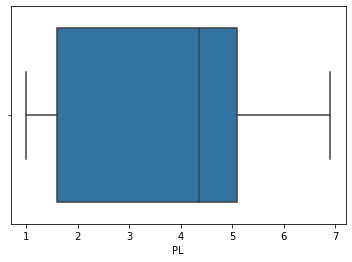

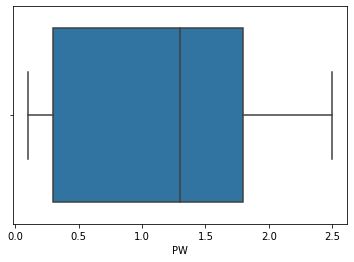

In [14]:
##checking for outliers using boxplot
for i in ['SL','SW','PL','PW']:
          sns.boxplot(data[i])
          plt.show()

In [15]:
##To deal with the outliers we are using interquartile range
##here we need to divide the dataset into quartiles Q1,Q2,Q3; using percetile function in numpy

Q1 = np.percentile(data['SW'],25,interpolation = 'midpoint')
Q2 = np.percentile(data['SW'],50,interpolation = 'midpoint')
Q3 = np.percentile(data['SW'],75,interpolation = 'midpoint')

In [16]:
print('Q1:',Q1)
print('Q2:',Q2)
print('Q3:',Q3)

Q1: 2.8
Q2: 3.0
Q3: 3.25


In [17]:
IQR = Q3 - Q1
low_lim = Q1-1.5*IQR
up_lim = Q3 + 1.5*IQR
print('IQR is :',IQR)
print('Lower limit value is:',low_lim)
print('Upper limit value is:',up_lim)

IQR is : 0.4500000000000002
Lower limit value is: 2.1249999999999996
Upper limit value is: 3.9250000000000003


The values less than 2.12 and greater than 3.925 are outliers and they can be removed

In [19]:
##removing outliers
outlier = []
for x in data['SW']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)


In [20]:
print('Outliers :',outlier)

Outliers : [4.0, 4.4, 4.1, 4.2, 2.0]


In [21]:
##finding index of outliers
ind1 = data['SW'] > up_lim
data.loc[ind1].index ##here all values greater than upper limit are taken to index1 and locating their index valuesfrom the data

Int64Index([14, 15, 32, 33], dtype='int64')

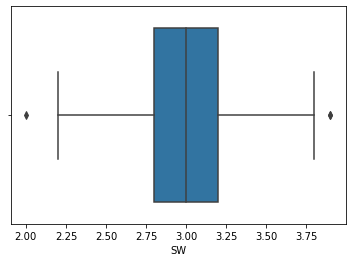

In [22]:
##dropping the above index values
data.drop([14, 15, 32, 33 ],inplace = True)
##plotting a box plot to check if the outliers are dropped
sns.boxplot(data['SW'])
plt.show()

3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [23]:
##splitting the dataset into features and target
x=data.drop('Classification',axis=1)
y=data['Classification']
##splitting the dataset into train and test set



In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)
##checking the no of datapoints in the training and testing set
x_train.shape

(109, 4)

In [25]:
x_test.shape

(37, 4)

# Logistic regression


In [26]:
##importing logistic regression model
from sklearn.linear_model import LogisticRegression



In [27]:
logit_model=LogisticRegression() ##creating an instance of the model
logit_model.fit(x_train,y_train) ##fitting the instance to x train and y train to create the model
y_pred=logit_model.predict(x_test) ##predicting the values and storing it
##checking the performance of our model


In [28]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,precision_score,recall_score
print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='macro'))
print('Recall score is:',recall_score(y_test,y_pred,average='macro'))
print('f1 score is:',f1_score(y_test,y_pred,average='macro'))

Accuracy score is: 0.918918918918919
Precision score is: 0.9002849002849004
Recall score is: 0.9118589743589745
f1 score is: 0.9047827567751666


In [29]:
##printing the confusion matrix
confusion_matrix(y_test,y_pred)

array([[15,  1,  0],
       [ 0,  7,  1],
       [ 0,  1, 12]], dtype=int64)

# KNN Model


In [30]:
##importing KNN model
from sklearn.neighbors import KNeighborsClassifier

##we need to find the optimum k value for which we have to create the model with varying k values

aq_val=[] ##an empty list is made first
neighbors=np.arange(3,15) ##taking values 3 to 15 to neighbor

for k in neighbors: ##for creating knn model
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)##predicting the output
    aq=accuracy_score(y_test,y_pred) ##appending the accuracy values to empty list to find maximum accuracy
    aq_val.append(aq)
    


In [31]:
##Checking accuracy values
aq_val

[0.9459459459459459,
 0.972972972972973,
 0.972972972972973,
 0.972972972972973,
 0.972972972972973,
 0.9459459459459459,
 0.9459459459459459,
 0.918918918918919,
 0.9459459459459459,
 0.9459459459459459,
 0.9459459459459459,
 0.918918918918919]

<function matplotlib.pyplot.show(close=None, block=None)>

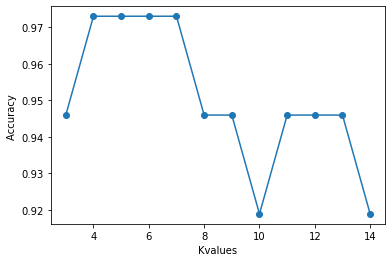

In [32]:
##checking for which k value we got the highest accuracy
plt.plot(neighbors,aq_val,'o-')
plt.xlabel('Kvalues')
plt.ylabel('Accuracy ')
plt.show

we are making a model with k as 6



In [33]:
classifier=KNeighborsClassifier(n_neighbors=6,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)


In [34]:
##printing the perfomance analyzing values
print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='macro'))
print('Recall score is:',recall_score(y_test,y_pred,average='macro'))
print('f1 score is:',f1_score(y_test,y_pred,average='macro'))

Accuracy score is: 0.972972972972973
Precision score is: 0.9629629629629629
Recall score is: 0.9791666666666666
f1 score is: 0.9696394686907022


In [35]:
confusion_matrix(y_test,y_pred)

array([[15,  1,  0],
       [ 0,  8,  0],
       [ 0,  0, 13]], dtype=int64)

# Decision Tree


In [37]:
##importing the decision tree model
from sklearn.tree import DecisionTreeClassifier

dmodel=DecisionTreeClassifier() ##creating an instance and storing it
dmodel.fit(x_train,y_train)



DecisionTreeClassifier()

In [38]:
y_pred=dmodel.predict(x_test)
##printing the perfomance analyzing values
print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='macro'))
print('Recall score is:',recall_score(y_test,y_pred,average='macro'))
print('f1 score is:',f1_score(y_test,y_pred,average='macro'))

Accuracy score is: 0.9459459459459459
Precision score is: 0.9326923076923078
Recall score is: 0.9326923076923078
f1 score is: 0.9326923076923078


In [39]:
##printing the confusion matrix
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0,  7,  1],
       [ 0,  1, 12]], dtype=int64)

# Random Forest


In [41]:
##importing the random forest model
from sklearn.ensemble import RandomForestClassifier
ramf=RandomForestClassifier()
ramf.fit(x_train,y_train)
y_pred=ramf.predict(x_test)

In [42]:
##printing the perfomance analyzing values
print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='macro'))
print('Recall score is:',recall_score(y_test,y_pred,average='macro'))
print('f1 score is:',f1_score(y_test,y_pred,average='macro'))

Accuracy score is: 0.9459459459459459
Precision score is: 0.9326923076923078
Recall score is: 0.9326923076923078
f1 score is: 0.9326923076923078


In [43]:
##printing the confusion matrix
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0,  7,  1],
       [ 0,  1, 12]], dtype=int64)

# SVM


# Linear SVM



In [44]:
from sklearn.svm import SVC
slinear=SVC(kernel='linear')
slinear.fit(x_train,y_train)
y_pred=slinear.predict(x_test)


In [45]:
print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='macro'))
print('Recall score is:',recall_score(y_test,y_pred,average='macro'))
print('f1 score is:',f1_score(y_test,y_pred,average='macro'))

Accuracy score is: 0.972972972972973
Precision score is: 0.9761904761904763
Recall score is: 0.9583333333333334
f1 score is: 0.9654320987654321


In [46]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 13]], dtype=int64)

# polynomial SVM



In [47]:
spolynomial=SVC(kernel='poly',degree=3)
spolynomial.fit(x_train,y_train)
y_pred=spolynomial.predict(x_test)


In [48]:
print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='macro'))
print('Recall score is:',recall_score(y_test,y_pred,average='macro'))
print('f1 score is:',f1_score(y_test,y_pred,average='macro'))

Accuracy score is: 0.9459459459459459
Precision score is: 0.9345238095238096
Recall score is: 0.9375
f1 score is: 0.9352349661489446


In [49]:
confusion_matrix(y_test,y_pred)

array([[15,  1,  0],
       [ 0,  7,  1],
       [ 0,  0, 13]], dtype=int64)

# Radial SVM



In [53]:
sradial=SVC(kernel='rbf')
sradial.fit(x_train,y_train)
y_pred=sradial.predict(x_test)


In [55]:
# print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='macro'))
print('Recall score is:',recall_score(y_test,y_pred,average='macro'))
print('f1 score is:',f1_score(y_test,y_pred,average='macro'))

Precision score is: 0.9090909090909092
Recall score is: 0.9278846153846154
f1 score is: 0.9088379551028107


In [54]:
confusion_matrix(y_test,y_pred)

array([[15,  1,  0],
       [ 0,  8,  0],
       [ 0,  2, 11]], dtype=int64)

# Inference
The accuracy value of KNN and linear SVM model(97%) is the highest. They both have same value. This suggests that these models gives the best result to predict iris species

Highest F1 score is shown by KNN(0.969639). 
It is closely followed by Linear SVM model( 0.965432).